# Checkpoint 2

Brooke Guo, Gloria Jeng, Chuanhai Xu, Angela Zhang

## Data preprocessing

Imports:

In [ ]:
import numpy as np
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from matplotlib.lines import Line2D

Read csv into dataframe:

In [ ]:
original_df = pd.read_csv("bike_dataset.csv")
original_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Extract engine cubic capcity (CC) from motorcycle name to new column "CC". When unable to extract, fill with *NaN*:

In [ ]:
def extract_cc(name):
  result = re.search(r'(\d{3})$', name)
  return int(result.group(0)) if result != None else pd.NA

original_df["CC"] = original_df["name"].apply(extract_cc)
original_df["CC"] = original_df["CC"].astype("Int64")
original_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,350
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,<NA>
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,<NA>
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,<NA>
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,<NA>
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,<NA>
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,<NA>
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,125
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,<NA>


Original dataset currency was in rupees, confirmed by manually comparing ex_showroom_price to online prices for several motorcycles.

Convert to USD using exchange rate as of early 2020 (last year in the dataset)

In [ ]:
original_df["selling_price"] = original_df["selling_price"] / 71
original_df["ex_showroom_price"] = original_df["ex_showroom_price"] / 71

## Basic data exploration and summary statistics

Column types:

In [ ]:
original_df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
CC                     Int64
dtype: object

Summary statistics:

In [ ]:
original_df.describe(include="all")

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
count,1061,1061.000000,1061.000000,1061,1061,1061.000000,6.260000e+02,344.0
unique,279,NaN,NaN,2,4,NaN,NaN,<NA>
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN,NaN,<NA>
freq,41,NaN,NaN,1055,924,NaN,NaN,<NA>
mean,NaN,59638.151744,2013.867107,NaN,NaN,34359.833176,8.795871e+04,202.895349
std,NaN,56304.291973,4.301191,NaN,NaN,51623.152702,7.749659e+04,119.364696
min,NaN,5000.000000,1988.000000,NaN,NaN,350.000000,3.049000e+04,14.0
25%,NaN,28000.000000,2011.000000,NaN,NaN,13500.000000,5.485200e+04,125.0
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000,7.275250e+04,150.0
75%,NaN,70000.000000,2017.000000,NaN,NaN,43000.000000,8.703150e+04,220.0


In [ ]:
original_df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [ ]:
original_df['owner'].value_counts()

owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64

## Comparing selling price to ex showroom

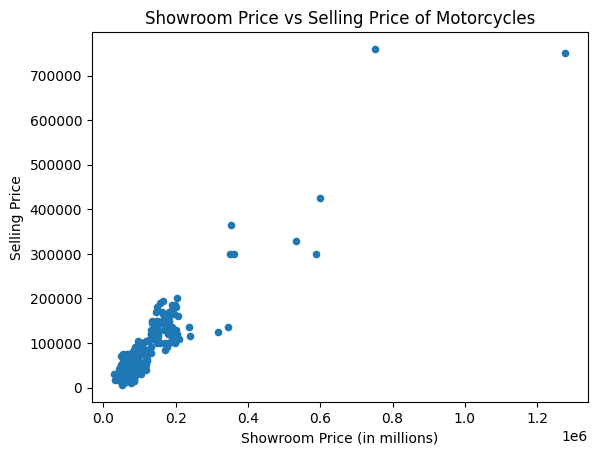

In [ ]:
data = original_df.copy()

data.plot.scatter(x='ex_showroom_price', y='selling_price')
plt.title('Showroom Price vs Selling Price of Motorcycles')
plt.xlabel("Showroom Price (in millions)")
plt.ylabel("Selling Price")
plt.show()

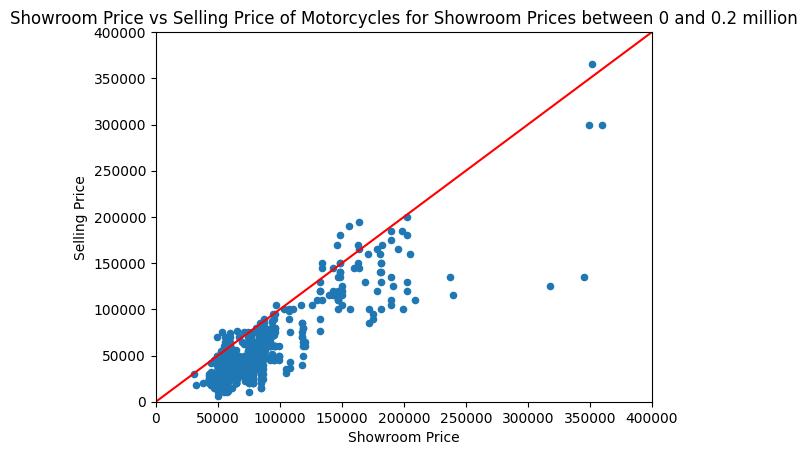

In [ ]:
# zoomed in
data.plot.scatter(x='ex_showroom_price', y='selling_price')
plt.xlim(0,.4*1000000)
plt.ylim(0,.4*1000000)
plt.plot([0,.4*1000000], [0,.4*1000000], color='red')
plt.title('Showroom Price vs Selling Price of Motorcycles for Showroom Prices between 0 and 0.2 million')
plt.xlabel("Showroom Price")
plt.ylabel("Selling Price")
plt.show()

Observations:

- Selling prices tend to be lower than showroom prices
- Most of data is in range of 400,000

### Closer inspection

By number of previous owners

In [ ]:
colors = []
for own_num in data['owner']:
    if own_num == '1st owner':
        colors.append('orange')
    elif own_num == '2nd owner':
        colors.append('green' )
    else:
        colors.append('black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


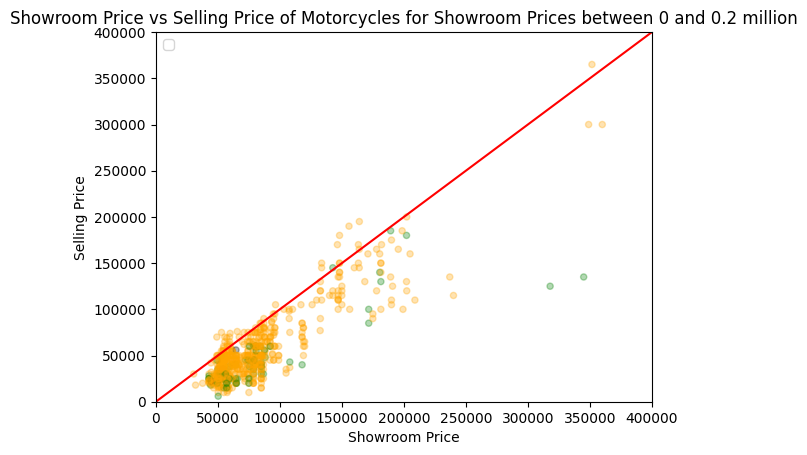

In [ ]:
data.plot.scatter(x='ex_showroom_price', y='selling_price', c=colors, alpha=.3)
plt.xlim(0,.4*1000000)
plt.ylim(0,.4*1000000)
plt.plot([0,.4*1000000], [0,.4*1000000], color='red')
plt.legend()
plt.title('Showroom Price vs Selling Price of Motorcycles for Showroom Prices between 0 and 0.2 million')
plt.xlabel("Showroom Price")
plt.ylabel("Selling Price")
plt.show()

By year of purchase

In [ ]:
mean_year = 2013.867107

In [ ]:
colors = []
for year_num in data['year']:
    if year_num < mean_year:
        colors.append('orange')
    elif year_num > mean_year:
        colors.append('green' )

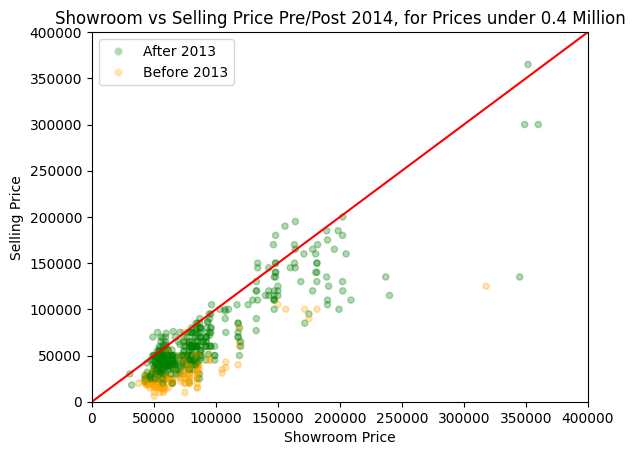

In [ ]:
data.plot.scatter(x='ex_showroom_price', y='selling_price', c=colors, alpha=.3)
plt.xlim(0,.4*1000000)
plt.ylim(0,.4*1000000)
plt.plot([0,.4*1000000], [0,.4*1000000], color='red')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='After 2013',
                          markerfacecolor='green', alpha=.3),
                   Line2D([0], [0], marker='o', color='w', label='Before 2013',
                          markerfacecolor='orange', alpha=.3)]

# # Create the figure
# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')
plt.title('Showroom vs Selling Price Pre/Post 2014, for Prices under 0.4 Million')
plt.legend(handles=legend_elements)
plt.xlabel("Showroom Price")
plt.ylabel("Selling Price")
plt.show()

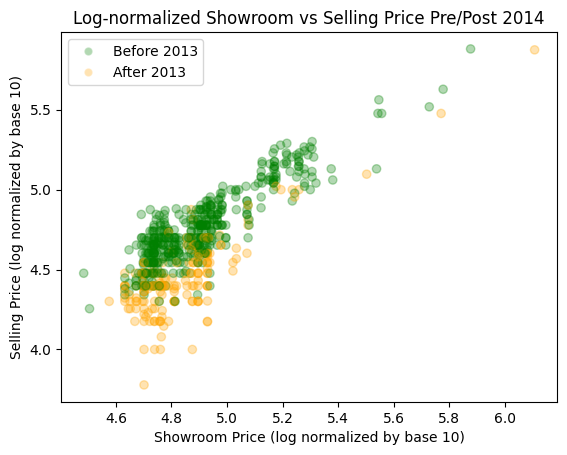

In [ ]:
# graphing on a log scale

plt.scatter(x=data['ex_showroom_price'].apply(math.log10), y=data['selling_price'].apply(math.log10), c=colors, alpha=.3)
# plt.xlim(0,.4*1000000)
# plt.ylim(0,.4*1000000)
# plt.plot([3.7,6.5], [3.7,6.5], color='red')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Before 2013',
                          markerfacecolor='green', alpha=.3),
                   Line2D([0], [0], marker='o', color='w', label='After 2013',
                          markerfacecolor='orange', alpha=.3)]

# # Create the figure
# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')
plt.title('Log-normalized Showroom vs Selling Price Pre/Post 2014')
plt.legend(handles=legend_elements)
plt.xlabel("Showroom Price (log normalized by base 10)")
plt.ylabel("Selling Price (log normalized by base 10)")
plt.show()

### Statistical testing

Used independent t test (each group has >>30 samples) to compare differences in cost differences pre/post 2014 (mean of years in all data)

In [ ]:
temp = data.loc[data['year']<mean_year][['ex_showroom_price','selling_price']].dropna()
print('Data points in set 1: %d' % len(temp))
pre14 = (temp['selling_price'] - temp['ex_showroom_price']).to_list()
temp = data.loc[data['year']>mean_year][['ex_showroom_price','selling_price']].dropna()
print('Data points in set 2: %d' % len(temp))
post14 = (temp['selling_price'] - temp['ex_showroom_price']).to_list()


# Conduct the one-way ANOVA
ttest_ind(pre14,post14)

Data points in set 1: 185
Data points in set 2: 441


TtestResult(statistic=-7.473396509504962, pvalue=2.6534062920839427e-13, df=624.0)

In [ ]:
temp = data.loc[data['year']<mean_year][['ex_showroom_price','selling_price']].dropna()
pre14 = (temp['selling_price'].apply(math.log10) - temp['ex_showroom_price'].apply(math.log10)).to_list()
temp = data.loc[data['year']>mean_year][['ex_showroom_price','selling_price']].dropna()
post14 = (temp['selling_price'].apply(math.log10) - temp['ex_showroom_price'].apply(math.log10)).to_list()


# Conduct the one-way ANOVA
ttest_ind(pre14,post14)

TtestResult(statistic=-21.13650570883146, pvalue=3.370499646737896e-75, df=624.0)

### Results

T-test extracted significant p value for comparison of difference in selling/showroom price for linearly scaled prices
T-test additionally extracted siginificant p value for comparison of difference of log-scaled prices

## Selling price vs engine size

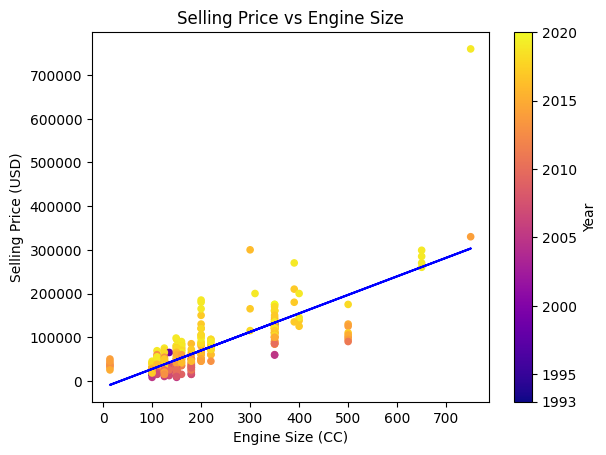

In [ ]:
df = original_df.copy()
temp_df = df[df["CC"].notna()]

ax = temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma, colorbar=False)
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling Price (USD)')
plt.title('Selling Price vs Engine Size')

colorbar = plt.colorbar(ax.collections[0], ax=ax, ticks=[1993, 1995, 2000, 2005, 2010, 2015, 2020])
colorbar.set_label('Year')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="blue")

plt.show()

In [ ]:
df[df["selling_price"] > 600000]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0,<NA>
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0,750


There are two

In [ ]:
correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between Engine Size and Selling Price: {correlation:.3f}")

correlation = df["year"].corr(df["selling_price"])
print(f"Correlation between Year and Selling price: {correlation:.3f}")

Correlation between Engine Size and Selling Price: 0.787
Correlation between Year and Selling price: 0.402


There is a strong positive linear relationship between engine size and selling price,
and a moderate positive linear relationship between year and selling price

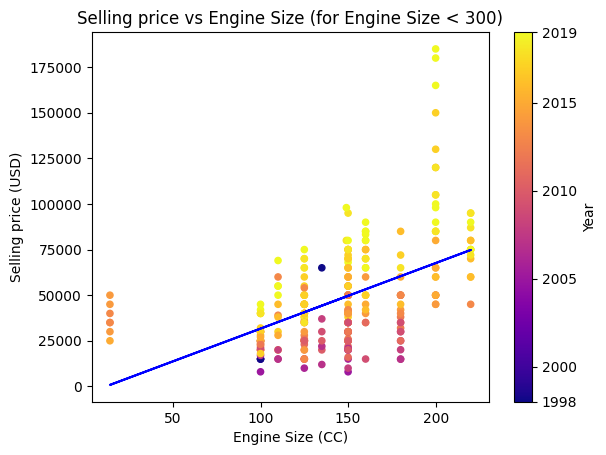

In [ ]:
temp_df = df[df["CC"].notna()]
temp_df = temp_df[temp_df["CC"] < 300]
ax = temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma, colorbar=False)
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling price (USD)')
plt.title('Selling price vs Engine Size (for Engine Size < 300)')

colorbar = plt.colorbar(ax.collections[0], ax=ax, ticks=[1998, 2000, 2005, 2010, 2015, 2019])
colorbar.set_label('Year')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="blue")

plt.show()

In [ ]:
correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between Engine Size and Selling Price for CC < 300: {correlation:.3f}")

correlation = temp_df["year"].corr(temp_df["selling_price"])
print(f"Correlation between Year and selling price for CC < 300: {correlation:.3f}")

Correlation between Engine Size and Selling Price for CC < 300: 0.506
Correlation between Year and selling price for CC < 300: 0.616


There are moderate positive linear relationships between engine size and selling price, and year and selling price for engine size < 300

## Km driven vs previous owners

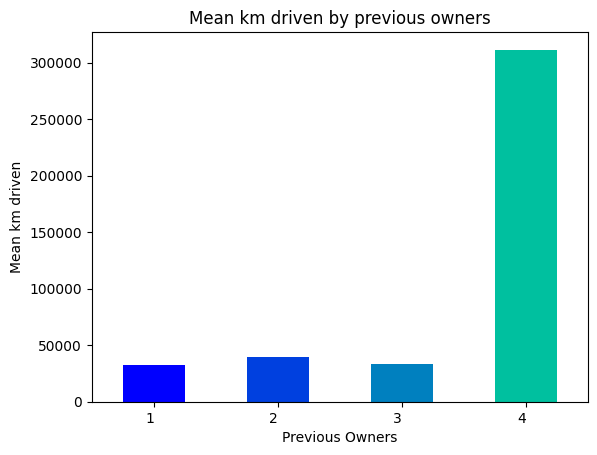

In [ ]:
grouped_data = df.groupby('owner')['km_driven'].mean()

ax = grouped_data.plot.bar(color=plt.get_cmap("winter")(np.arange(4) / 4))
plt.xlabel('Previous Owners')
plt.ylabel('Mean km driven')
plt.title('Mean km driven by previous owners')

ax.set_xticklabels([label.get_text()[0] for label in ax.get_xticklabels()], rotation=0, ha="right")

plt.show()

There seems to be an outlier in the group of 4 previous owners

In [ ]:
display(df[df["owner"] == "4th owner"])

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0,750
642,TVS Apache RTR 160,15000,2009,Individual,4th owner,880000,NaN,160
698,Hero Honda CBZ,10000,2000,Individual,4th owner,48000,NaN,<NA>


Remove the outlier for analysis

In [ ]:
df.drop(642, inplace=True)

display(df[df["owner"] == "4th owner"])

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0,750
698,Hero Honda CBZ,10000,2000,Individual,4th owner,48000,NaN,<NA>


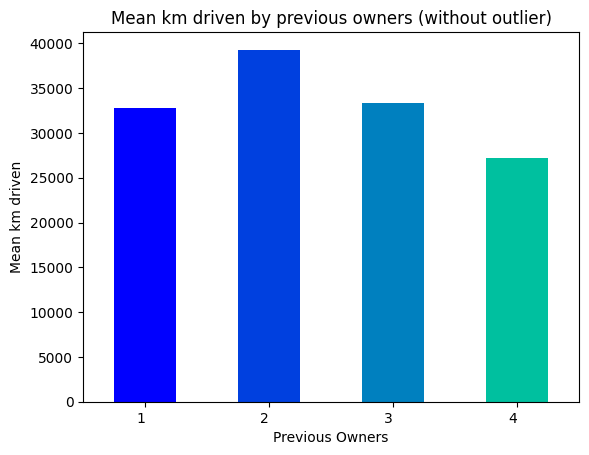

In [ ]:
grouped_data = df.groupby('owner')['km_driven'].mean()

ax = grouped_data.plot.bar(color=plt.get_cmap("winter")(np.arange(4) / 4))
plt.xlabel('Previous Owners')
plt.ylabel('Mean km driven')
plt.title('Mean km driven by previous owners (without outlier)')

ax.set_xticklabels([label.get_text()[0] for label in ax.get_xticklabels()], rotation=0, ha="right")

plt.show()

In [ ]:
grouped_data = [group['km_driven'].values for name, group in df.groupby('owner')]
print(stats.f_oneway(*grouped_data).pvalue)

0.5085253640620842


We conclude that there does not seem to be significant difference between km driven and number of previous owners.

## Correlation between number of owners and year


In [ ]:
df = original_df.copy()

In [ ]:
contingency_table = pd.crosstab(df['owner'], df['year'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"P-Value: {p}")

P-Value: 8.262405973018966e-27


**Result Interpretation**: Since the P-Value is much smaller than 0.05, we reject the null hypothesis. This suggests that there is a statistically significant association between the owner and the year. This suggests that the ownership type (1st or 2nd) is likely to influence or be related to the year of the vehicle.

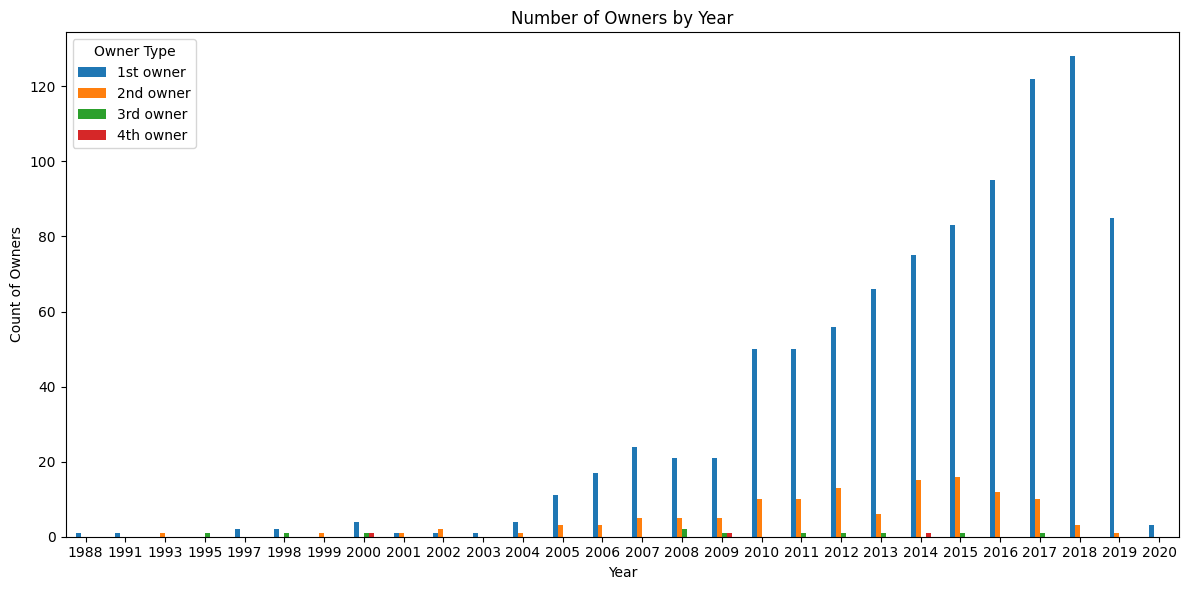

In [ ]:
count_df = df.groupby(['year', 'owner']).size().unstack(fill_value=0)

count_df.plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title('Number of Owners by Year')
plt.xlabel('Year')
plt.ylabel('Count of Owners')
plt.xticks(rotation=0)
plt.legend(title='Owner Type')
plt.tight_layout()
plt.show()

1st owners of bikes increase as the year increases. The sudden drop in 2020 can be due to the pandemic, and people stopped releasing bikes or they just stopped collecting data.

## Selling price before/after 2015

In [ ]:
bike_data = original_df.copy()
bike_data_clean = bike_data.dropna(subset=['selling_price', 'year'])

In [ ]:
group_after_2015 = bike_data_clean[bike_data_clean['year'] > 2015]['selling_price']
group_before_2015 = bike_data_clean[bike_data_clean['year'] <= 2015]['selling_price']

mean_after_2015 = np.mean(group_after_2015)
mean_before_2015 = np.mean(group_before_2015)

std_after_2015 = np.std(group_after_2015, ddof=1)
std_before_2015 = np.std(group_before_2015, ddof=1)

n_after_2015 = len(group_after_2015)
n_before_2015 = len(group_before_2015)

In [ ]:
z_score = (mean_after_2015 - mean_before_2015) / np.sqrt((std_after_2015**2 / n_after_2015) + (std_before_2015**2 / n_before_2015))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))


mean_after_2015 = float(mean_after_2015)
mean_before_2015 = float(mean_before_2015)
z_score = float(z_score)
p_value = float(p_value)
mean_after_2015, mean_before_2015, z_score, p_value

(84947.80869565217, 40266.36772046589, 13.26869064380394, 0.0)

In [ ]:
print("This leads to the conclusion that the means of selling prices before and after 2015 are statistically significantly different.")

This leads to the conclusion that the means of selling prices before and after 2015 are statistically significantly different.


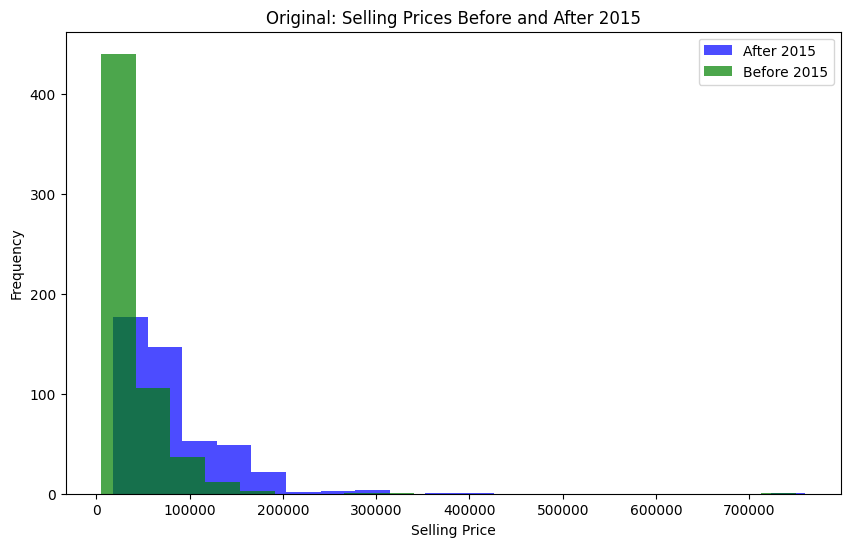

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(group_after_2015, bins=20, alpha=0.7, label="After 2015", color="blue")
plt.hist(group_before_2015, bins=20, alpha=0.7, label="Before 2015", color="green")
plt.title('Original: Selling Prices Before and After 2015')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
Q1 = bike_data_clean['selling_price'].quantile(0.25)
Q3 = bike_data_clean['selling_price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bike_data_no_outliers = bike_data_clean[(bike_data_clean['selling_price'] >= lower_bound) & (bike_data_clean['selling_price'] <= upper_bound)]

In [ ]:
group_after_2015_no_outliers = bike_data_no_outliers[bike_data_no_outliers['year'] > 2015]['selling_price']
group_before_2015_no_outliers = bike_data_no_outliers[bike_data_no_outliers['year'] <= 2015]['selling_price']

mean_after_2015_no_outliers = np.mean(group_after_2015_no_outliers)
mean_before_2015_no_outliers = np.mean(group_before_2015_no_outliers)

std_after_2015_no_outliers = np.std(group_after_2015_no_outliers, ddof=1)
std_before_2015_no_outliers = np.std(group_before_2015_no_outliers, ddof=1)

n_after_2015_no_outliers = len(group_after_2015_no_outliers)
n_before_2015_no_outliers = len(group_before_2015_no_outliers)

In [ ]:
z_score_no_outliers = (mean_after_2015_no_outliers - mean_before_2015_no_outliers) / np.sqrt((std_after_2015_no_outliers**2 / n_after_2015_no_outliers) + (std_before_2015_no_outliers**2 / n_before_2015_no_outliers))
p_value_no_outliers = 2 * (1 - stats.norm.cdf(abs(z_score_no_outliers)))


mean_after_2015_no_outliers = float(mean_after_2015_no_outliers)
mean_before_2015_no_outliers = float(mean_before_2015_no_outliers)
z_score_no_outliers = float(z_score_no_outliers)
p_value_no_outliers = float(p_value_no_outliers)

mean_after_2015_no_outliers, mean_before_2015_no_outliers, z_score_no_outliers, p_value_no_outliers

(64455.476439790575, 36892.03885135135, 16.785884924165888, 0.0)

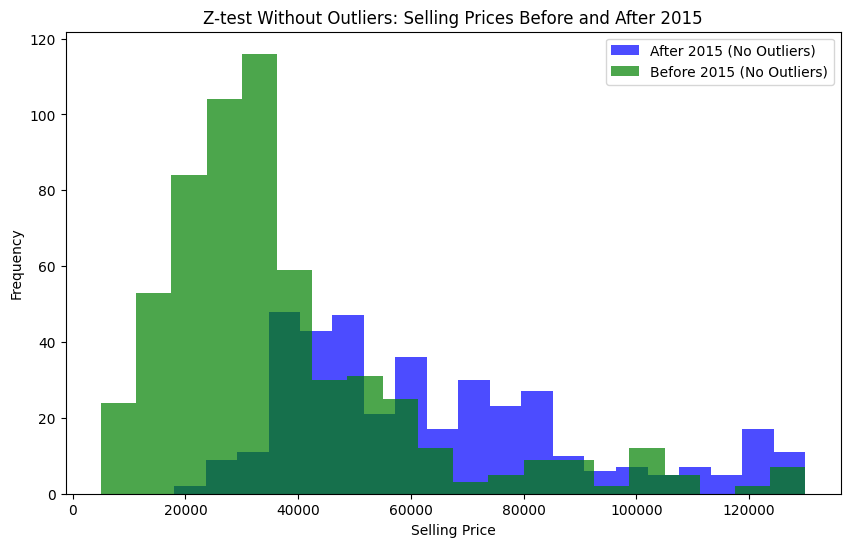

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(group_after_2015_no_outliers, bins=20, alpha=0.7, label="After 2015 (No Outliers)", color="blue")
plt.hist(group_before_2015_no_outliers, bins=20, alpha=0.7, label="Before 2015 (No Outliers)", color="green")
plt.title('Z-test Without Outliers: Selling Prices Before and After 2015')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()